# **Project: Credit Card Fraud Detection**

Gian lận thẻ tín dụng là các hoạt động sử dụng công nghệ cao để đánh cắp thông tin thẻ tín dụng (Visa, MasterCad, ATM...) và thực hiện các giao dịch thanh toán, rút tiền bằng thẻ mà người thực hiện không phải là chủ thẻ, nhưng cuối cùng người chịu thiệt lại chính chủ thẻ chứ không phải ai khác.

Khi sử dụng thẻ tín dụng hoặc thẻ thanh toán, các hệ thống phát hiện gian lận thường sẽ theo dõi và phân tích các giao dịch dựa trên một loạt các yếu tố. Nếu có bất kỳ dấu hiệu nào khác thường hoặc bất thường trong các giao dịch, hệ thống có thể kích hoạt cảnh báo gian lận để ngăn chặn các hoạt động không đúng đắn và bảo vệ tài khoản của bạn.

Những dấu hiệu không thường có thể bao gồm:

**1. Giao dịch lớn hơn mức bình thường**: Nếu có một giao dịch lớn hơn bình thường hoặc không phù hợp với lịch sử giao dịch của bạn, hệ thống có thể cảnh báo.

**2. Giao dịch ở địa điểm không phải là thường trú**: Nếu thẻ của bạn được sử dụng tại địa điểm không phải là nơi bạn thường xuyên sử dụng, hệ thống có thể phát hiện và cảnh báo.

**3. Giao dịch vào thời điểm không phù hợp**: Nếu giao dịch xảy ra vào thời điểm không thường xuyên hoặc không phù hợp với hành vi tiêu dùng của bạn.

**4. Các giao dịch lặp đi lặp lại hoặc không phù hợp**: Nếu có một lượng lớn giao dịch cùng loại hoặc không phù hợp với hành vi tiêu dùng của bạn.

**5. Giao dịch từ quốc gia khác**: Nếu giao dịch xảy ra từ quốc gia bạn không thường xuyên thực hiện giao dịch.

Tất cả những dấu hiệu này đều có thể được sử dụng để kích hoạt cảnh báo gian lận, giúp bảo vệ tài khoản và tài chính của bạn khỏi các hoạt động không mong muốn.



# Nguồn dữ liệu và tổng quan


Trong dự án này, tôi đang kiểm tra Bộ dữ liệu phát hiện gian lận giao dịch thẻ tín dụng chứa cả tập dữ liệu huấn luyện và tập dữ liệu thử nghiệm (https://www.kaggle.com/datasets/kartik2112/fraud-detection). Trước tiên, tôi sẽ thực hiện phân tích dữ liệu khám phá đối với dữ liệu đào tạo để hiểu những tính năng nào có thể liên quan đến các hoạt động gian lận, sau đó cố gắng tạo các mô hình có các tính năng đó và kiểm tra tính hiệu quả dự đoán của chúng.

In [8]:
import pandas as pd
import numpy as np

In [ ]:
#import dữ liệu
df_raw = pd.read_csv('fraudTrain.csv')

# Data Understading

In [12]:
pd.set_option('display.max_columns', None)
df_raw.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**Có 23 cột dữ liệu bao gồm:**
- Unnamed: STT
- trans_date_trans_time: ngày giờ giao dịch
- cc_num: số thẻ
- merchant: đại lý giao dịch
- category: danh mục chi tiêu
- amt: số tiền giao dịch
- first: tên chủ thẻ
- last: họ chủ thẻ
- gender: giới tính chủ thẻ
- street: địa chỉ chủ thẻ
- city: thành phố
- state: bang
- zip: mã zip
- lat: kinh độ
- long: vĩ độ
- city_pop
- job: nghề nghiệp
- dob: ngày sinh
- trans_num: số giao dịch
- unix_time:
- merch_lat: kinh độ đại lý
- merch_long: vĩ độ đại lý
- is_fraud: gian lận

In [13]:
# Kiểm tra số cột, dòng
df_raw.shape

(1296675, 23)

In [14]:
# Kiểm tra kiểu dữ liệu
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

**Nhận xét:**
Bộ dữ liệu không có giá trị Null


**Loại bỏ các giá trị trùng lắp**

In [10]:
df = df_raw.copy()
df.drop_duplicates(inplace=True)

# Phân tích khai phá (EDA)

**1. Lượng tiền giao dịch (amt) vs Gian lận (Fraud)**

In [19]:
# Kiểm tra thống kê cơ bản về lượng tiền giao dịch
np.round(df['amt'].describe(), 2)

count    1296675.00
mean          70.35
std          160.32
min            1.00
25%            9.65
50%           47.52
75%           83.14
max        28948.90
Name: amt, dtype: float64

In [20]:
np.percentile(df['amt'],99)

545.9926000000002

Nhận xét: Vì có những giá trị ngoại lệ cực lớn về số tiền giao dịch và phân vị phần trăm 99 là khoảng $546, chúng tôi tập hợp dữ liệu cho bất kỳ số tiền giao dịch nào dưới $1.000 để làm cho hình ảnh trực quan dễ đọc hơn.

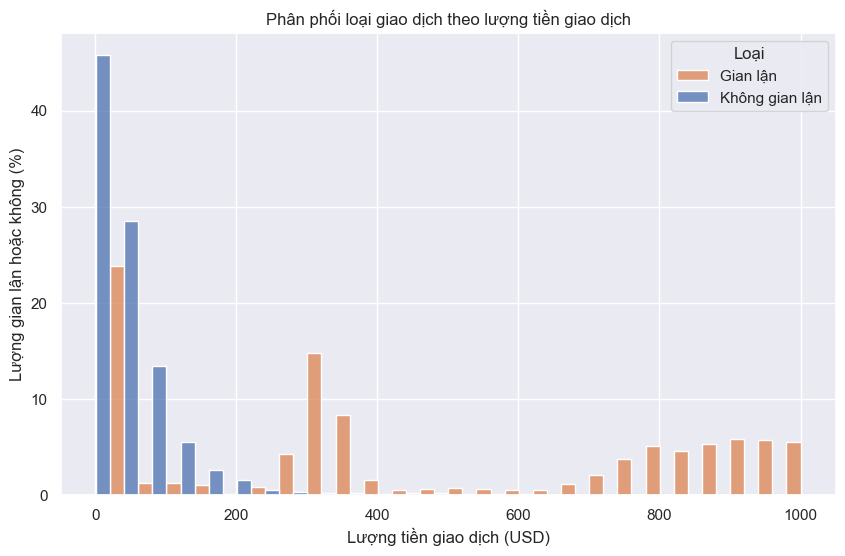

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
sns.set(rc = {'figure.figsize':(10,6)})

#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Lượng gian lận hoặc không (%)')
ax.set_xlabel('Lượng tiền giao dịch (USD)')
plt.title('Phân phối loại giao dịch theo lượng tiền giao dịch')
plt.legend(title='Loại', labels=['Gian lận', 'Không gian lận'])

Những giao dịch không gian lận thường xuất hiện ở khoảng $200 hoặc ít hơn, các giao dịch gian lận thì đạt đỉnh điểm ở khoảng $300 và ở khoảng $800 - $1000

**2. Giới tính (Gender) vs Fraud**

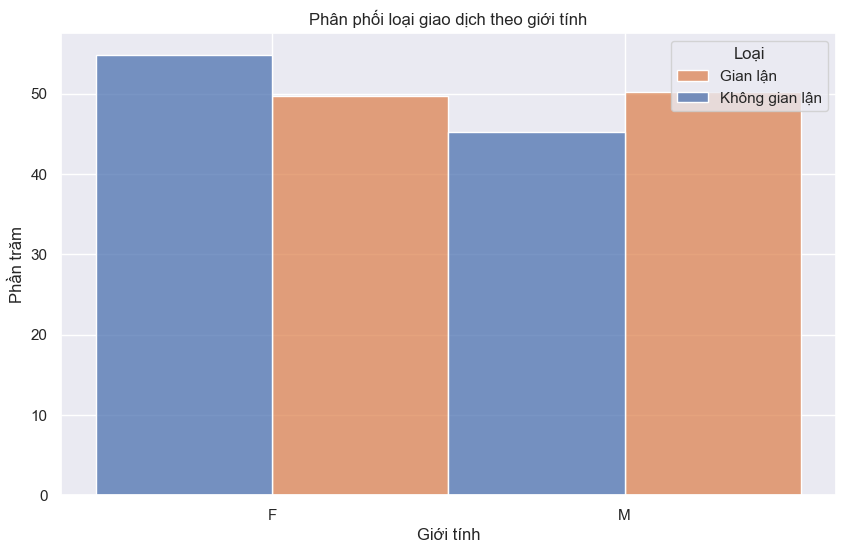

In [38]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Phần trăm')
ax.set_xlabel('Giới tính')
plt.title('Phân phối loại giao dịch theo giới tính')
plt.legend(title='Loại', labels=['Gian lận', 'Không gian lận'])

Dữ liệu dường như cho thấy rằng phụ nữ và nam giới gần như có khả năng bị gian lận giao dịch như nhau (50%). Giới tính không phải là dấu hiệu rõ ràng của một giao dịch gian lận.

**3. Tuổi (Age) vs Fraud**

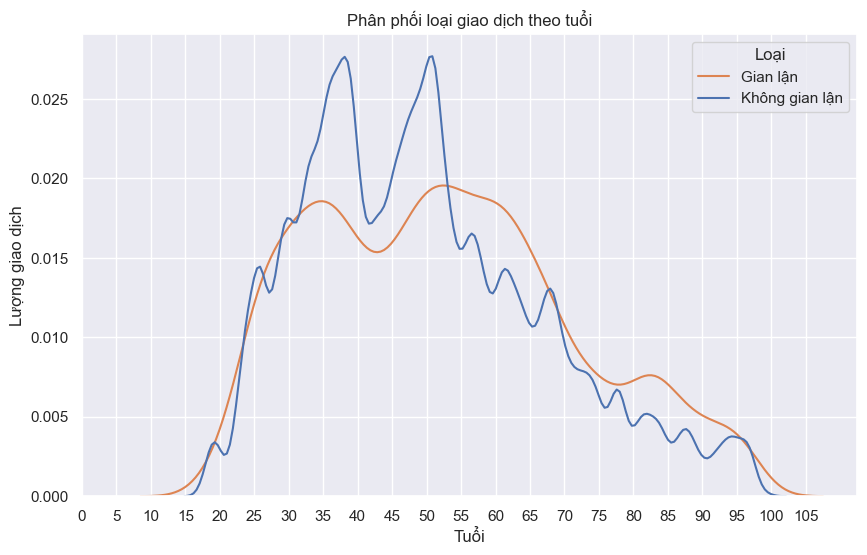

In [14]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Tuổi')
ax.set_ylabel('Lượng giao dịch')
plt.xticks(np.arange(0,110,5))
plt.title('Phân phối loại giao dịch theo tuổi')
plt.legend(title='Loại', labels=['Gian lận', 'Không gian lận'])

Sự phân bổ độ tuổi có sự khác biệt rõ ràng giữa 2 loại giao dịch. Trong các giao dịch thông thường, có 2 đỉnh ở độ tuổi 37-38 và 50-51, trong khi ở các giao dịch lừa đảo, sự phân bổ độ tuổi mượt mà hơn một chút và đỉnh thứ hai bao gồm nhóm tuổi rộng hơn từ 53-67. Điều này cho thấy người lớn tuổi có nhiều khả năng bị lừa đảo hơn.

**4. Thời gian trong ngày (Hour of Day) vs Fraud**

In [15]:
# Đổi Unix_Time thành hour_of_day

from datetime import datetime

# Sử dụng hàm utcfromtimestamp và drop cột unix_time
df['time'] = df['unix_time'].apply(datetime.utcfromtimestamp)
df.drop('unix_time', axis=1, inplace = True)

# Thêm cột hour_of_day
df['hour_of_day'] = df.time.dt.hour

In [36]:
df[['time','hour_of_day']]

,time,hour_of_day
0,2012-01-01 00:00:18,0
1,2012-01-01 00:00:44,0
2,2012-01-01 00:00:51,0
3,2012-01-01 00:01:16,0
4,2012-01-01 00:03:06,0
...,...,...
1296670,2013-06-21 12:12:08,12
1296671,2013-06-21 12:12:19,12
1296672,2013-06-21 12:12:32,12
1296673,2013-06-21 12:13:36,12


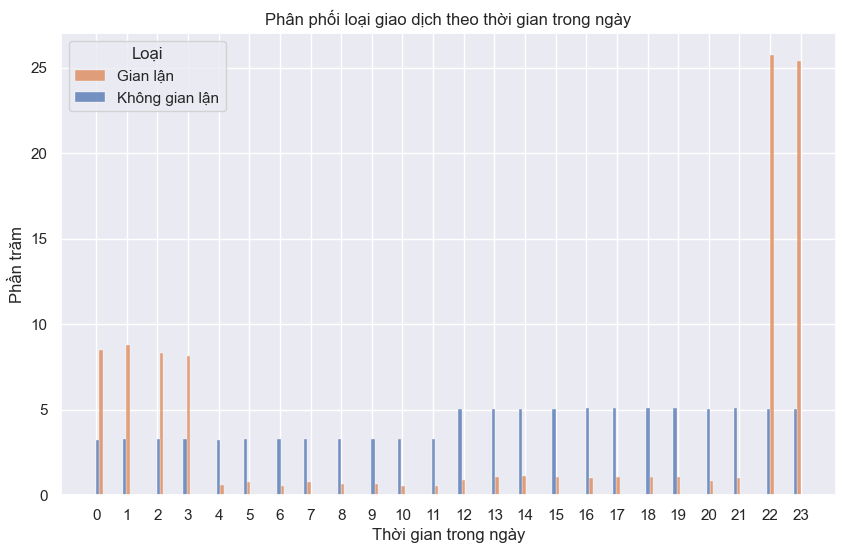

In [40]:
#time in a day vs fraud
ax=sns.histplot(data=df, x="hour_of_day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Phần trăm')
ax.set_xlabel('Thời gian trong ngày')
plt.xticks(np.arange(0,24,1))
plt.title('Phân phối loại giao dịch theo thời gian trong ngày')
plt.legend(title='Loại', labels=['Gian lận', 'Không gian lận'])

Trong khi các giao dịch thông thường phân bổ ít nhiều bằng nhau trong ngày thì các khoản thanh toán gian lận xảy ra không tương xứng vào khoảng nửa đêm khi hầu hết mọi người đang ngủ!

# Data Preprocessing

**Drop các cột không cần dùng đến trong dự báo**

In [64]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'time', 'hour_of_day'],
      dtype='object')

In [16]:
df.drop(["Unnamed: 0", "merchant",
"trans_date_trans_time","cc_num",
"first","last","street",
"city", "state", "city_pop", "job", "dob",
"trans_num", "time"],axis = 1,inplace = True)

In [81]:
# Kiểm tra lại kiểu dữ liệu các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   category     1296675 non-null  object 
 1   amt          1296675 non-null  float64
 2   gender       1296675 non-null  object 
 3   zip          1296675 non-null  int64  
 4   lat          1296675 non-null  float64
 5   long         1296675 non-null  float64
 6   merch_lat    1296675 non-null  float64
 7   merch_long   1296675 non-null  float64
 8   is_fraud     1296675 non-null  int64  
 9   age          1296675 non-null  int32  
 10  hour_of_day  1296675 non-null  int32  
dtypes: float64(5), int32(2), int64(2), object(2)
memory usage: 98.9+ MB


In [82]:
# Kiểm tra thông tin thống kê cơ bản dữ liệu
np.round(df.describe(), 2)

,amt,zip,lat,long,merch_lat,merch_long,is_fraud,age,hour_of_day
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00
mean,70.35,48800.67,38.54,-90.23,38.54,-90.23,0.01,49.74,12.80
std,160.32,26893.22,5.08,13.76,5.11,13.77,0.08,17.38,6.82
min,1.00,1257.00,20.03,-165.67,19.03,-166.67,0.00,18.00,0.00
25%,9.65,26237.00,34.62,-96.80,34.73,-96.90,0.00,36.00,7.00
50%,47.52,48174.00,39.35,-87.48,39.37,-87.44,0.00,48.00,14.00
75%,83.14,72042.00,41.94,-80.16,41.96,-80.24,0.00,61.00,19.00
max,28948.90,99783.00,66.69,-67.95,67.51,-66.95,1.00,99.00,23.00


**Nhận xét:**
Lượng tiền giao dịch nhỏ nhất là $1, lượng lớn nhất là gần $29.000, trung bình là khoảng $70. Có sự chênh lệch lớn trong lượng giao dịch cần kiểm tra ngoại lai.

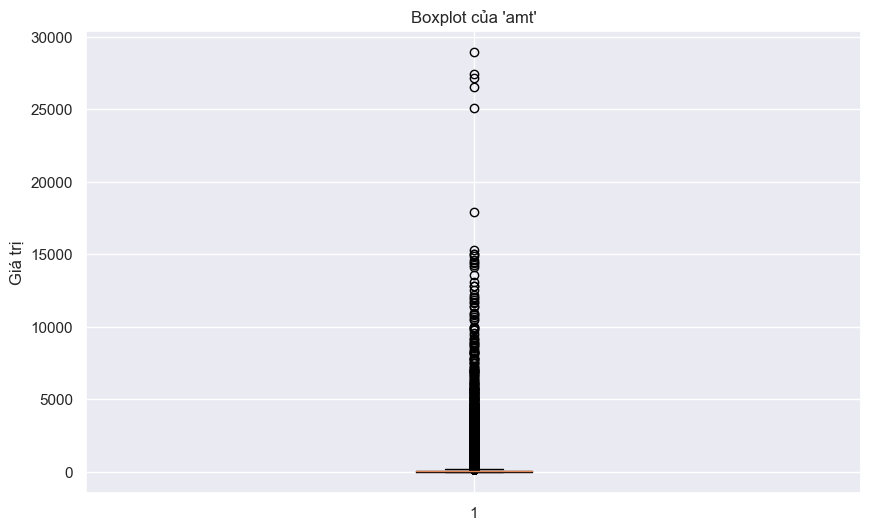

In [50]:
# Kiểm tra giá trị ngoại lai cột 'amt'

# Vẽ biểu đồ boxplot
plt.boxplot(df['amt'])

# Đặt tiêu đề và tên trục
plt.title("Boxplot của 'amt'")
plt.ylabel("Giá trị")

# Hiển thị biểu đồ
plt.show()

- Xuất hiện lượng lớn Outliers
- Giá trị Outliers rất lớn

In [52]:
# Xử lý Outliers bằng phương phát Clipping: Phương pháp này giới hạn giá trị ngoại lai trong một phạm vi cố định.
# Ví dụ, bạn có thể giới hạn giá trị ngoại lai trong khoảng từ Q1 - 1.5IQR đến Q3 + 1.5IQR
# (Q1 và Q3 lần lượt là phân vị thứ nhất và thứ ba, IQR là khoảng biệt phân vị).


# Tính Q1 và Q3
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)

# Tính khoảng biệt IQR
IQR = Q3 - Q1

# Xác định ngưỡng trên và ngưỡng dưới cho việc loại bỏ
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Loại bỏ giá trị ngoại lai
df = df[(df['amt'] >= lower_threshold) & (df['amt'] <= upper_threshold)]

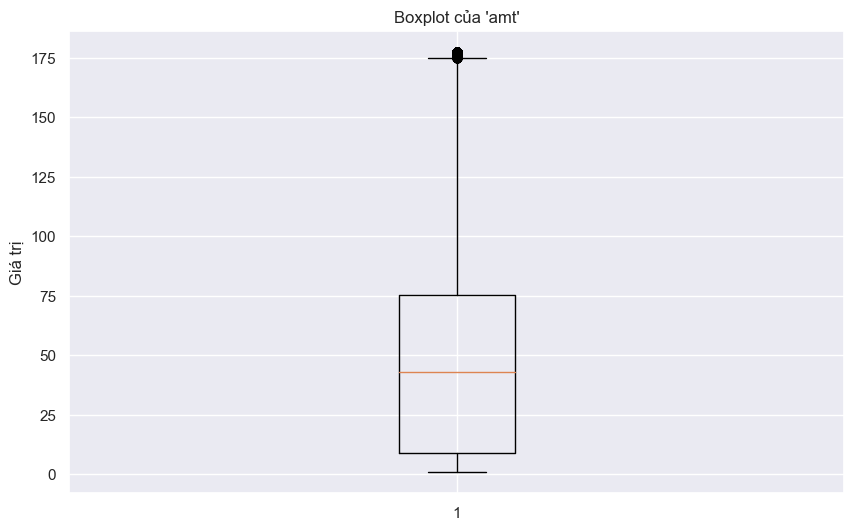

In [53]:
# Kiểm tra lại giá trị ngoại lai cột 'amt'

# Vẽ biểu đồ boxplot
plt.boxplot(df['amt'])

# Đặt tiêu đề và tên trục
plt.title("Boxplot của 'amt'")
plt.ylabel("Giá trị")

# Hiển thị biểu đồ
plt.show()

Các giá trị ngoại lai đã được xử lý

**Tuy nhiên có một vấn đề xảy ra:**

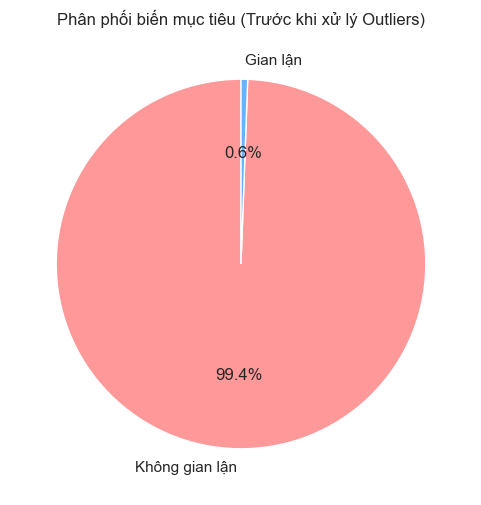

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [59]:
# Phân phối biến mục tiêu (Fraud) trước khi xử lý Outliers

plt.figure(figsize=(6, 6))
labels = ['Không gian lận', 'Gian lận']
sizes = df_raw['is_fraud'].value_counts()
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)
plt.title('Phân phối biến mục tiêu (Trước khi xử lý Outliers)')
plt.show()
df_raw["is_fraud"].value_counts()

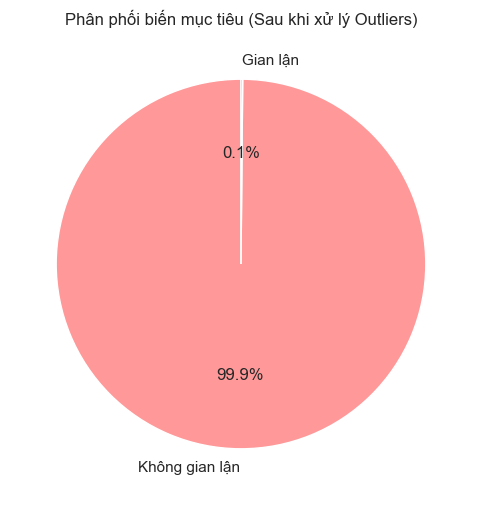

is_fraud
0    1214469
1       1798
Name: count, dtype: int64

In [60]:
# Phân phối biến mục tiêu (Fraud) trước khi xử lý Outliers

plt.figure(figsize=(6, 6))
labels = ['Không gian lận', 'Gian lận']
sizes = df['is_fraud'].value_counts()
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)
plt.title('Phân phối biến mục tiêu (Sau khi xử lý Outliers)')
plt.show()
df["is_fraud"].value_counts()

Lượng biến Fraud sau khi xử lý Outliers vốn đã rất mất cân bằng nay còn mất cân bằng nặng nề hơn, vì vậy chúng tôi quyết định không xử lý Outliers mà giữ nguyên để đảm bảo tránh mất cân bằng

**Thực hiện mã hóa dữ liệu**

Các cột dữ liệu'category', 'gender' là các biến categorical. Sử dụng phương pháp mã hóa dummies (one-hot encoding) để chuyển các biến categorical thành các biến nhị phân (0 hoặc 1)

In [17]:
df.columns

Index(['category', 'amt', 'gender', 'zip', 'lat', 'long', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'hour_of_day'],
      dtype='object')

In [18]:
# Lựa chọn biến Train
train=df[['category','amt','zip','lat','long','merch_lat','merch_long','age','hour_of_day','is_fraud']]

# Mã hóa bằng phương pháp Dummies
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values
print(train.head())

      amt    zip      lat      long  merch_lat  merch_long  age  hour_of_day  \
0    4.97  28654  36.0788  -81.1781  36.011293  -82.048315   35            0   
1  107.23  99160  48.8878 -118.2105  49.159047 -118.186462   45            0   
2  220.11  83252  42.1808 -112.2620  43.150704 -112.154481   61            0   
3   45.00  59632  46.2306 -112.1138  47.034331 -112.561071   56            0   
4   41.96  24433  38.4207  -79.4629  38.674999  -78.632459   37            0   

   is_fraud  category_food_dining  ...  category_grocery_pos  \
0         0                 False  ...                 False   
1         0                 False  ...                  True   
2         0                 False  ...                 False   
3         0                 False  ...                 False   
4         0                 False  ...                 False   

   category_health_fitness  category_home  category_kids_pets  \
0                    False          False               False   
1   

**Xử lý mất cân bằng biến mục tiêu 'Fraud'**

Ở bài toán phát hiện Giao dịch gian lận, mục đích chính cần hướng tới là phát hiện ra các giao dịch gian lận để bảo vệ tài khoản người dùng. Trong trường hợp của tập dữ liệu này, có sự mất cân bằng rất lớn giữa giao dịch gian lận và không gian lận, cụ thể là lượng giao dịch gian lận chỉ chiếm khoảng 0,6% vì vậy, để mô hình có thể học tốt hơn, hay nói cách khác là phát hiện các giao dịch gian lận tốt hơn, chúng ta cần thực hiện xử lý mất cân bằng biến 'Fraud'. Dù biết rằng hành động này sẽ tương ứng với việc phải hy sinh độ chính xác (accuracy) và (Precision) của mô hình, nhưng như đã nói ở trên, chúng ta quan tâm nhiều hơn đến giá trị Recall, nên ở bài toán này sẽ thực hiện xử lý mất cân bằng, cụ thể là phương pháp SMOTE

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

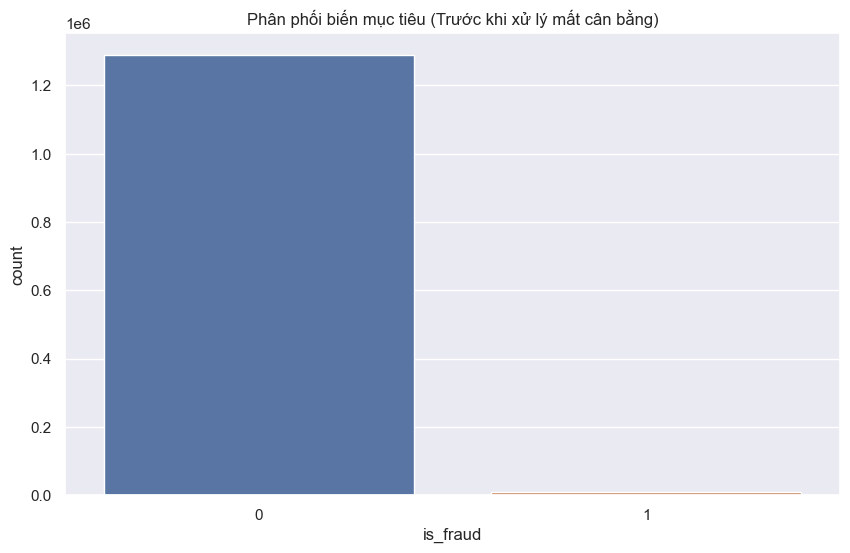

In [71]:
# Biến mục tiêu trước khi xử lý mất cân bằng

sns.countplot(data=df, x="is_fraud");
plt.title('Phân phối biến mục tiêu (Trước khi xử lý mất cân bằng)')
df["is_fraud"].value_counts()

In [69]:
df.head()

,merchant,category,amt,gender,zip,lat,long,merch_lat,merch_long,is_fraud,hour_of_day
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,36.011293,-82.048315,0,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,49.159047,-118.186462,0,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,43.150704,-112.154481,0,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,47.034331,-112.561071,0,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,38.674999,-78.632459,0,0


Text(0.5, 1.0, 'Phân phối biến mục tiêu (Sau khi xử lý mất cân bằng)')

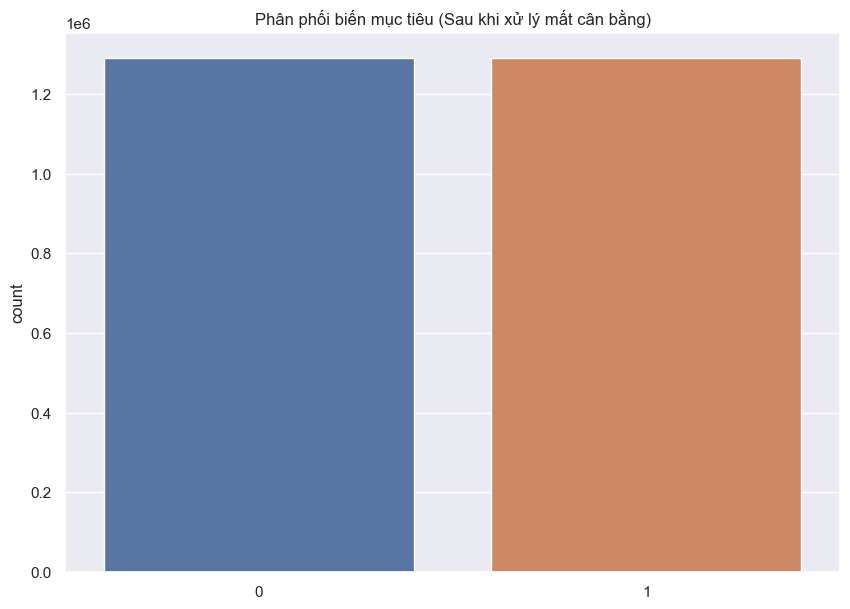

In [19]:
#Biến mục tiêu sau khi xử lý mất cân bằng
from imblearn.over_sampling import SMOTE
from collections import Counter

# Sử dụng SMOTE để tạo dữ liệu mới để cân bằng biến mục tiêu
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Biến mục tiêu sau khi xử lý mất cân bằng
plt.figure(figsize=(10, 7))
sns.countplot(data = df, x = y_resampled)
plt.title('Phân phối biến mục tiêu (Sau khi xử lý mất cân bằng)')

# Thực hiện Xây dựng mô hình dự báo

In [20]:
# Import dữ liệu Test
test=pd.read_csv('fraudTest.csv')

In [21]:
# Thực hiện các thao tác biến đổi dữ liệu với tập Test

# Thêm cột 'hour_of_day'
test['time'] = test['unix_time'].apply(datetime.utcfromtimestamp)
test['hour_of_day'] = test.time.dt.hour

# Thêm cột 'age'
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year

# Lựa chọn biến cho tập Test
test=test[['category','amt','zip','lat','long','merch_lat','merch_long','age','hour_of_day', 'is_fraud']]

# Mã hóa với phương pháp Dummies
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values
print(test.head())

     amt    zip      lat      long  merch_lat  merch_long  age  hour_of_day  \
0   2.86  29209  33.9659  -80.9355  33.986391  -81.200714   55           12   
1  29.84  84002  40.3207 -110.4360  39.450498 -109.960431   33           12   
2  41.28  11710  40.6729  -73.5365  40.495810  -74.196111   53           12   
3  60.05  32780  28.5697  -80.8191  28.812398  -80.883061   36           12   
4   3.19  49632  44.2529  -85.0170  44.959148  -85.884734   68           12   

   is_fraud  category_food_dining  ...  category_grocery_pos  \
0         0                 False  ...                 False   
1         0                 False  ...                 False   
2         0                 False  ...                 False   
3         0                 False  ...                 False   
4         0                 False  ...                 False   

   category_health_fitness  category_home  category_kids_pets  \
0                    False          False               False   
1         

**Xây dựng các mô hình dự báo phân loại (Catogorical)**

In [23]:
#Import thư viện
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [26]:
# Xây dựng mô hình Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_resampled, y_resampled)

# Dự đoán trên tập test
logreg_pred = logreg_model.predict(X_test)

In [27]:
# Đánh giá mô hình
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_classification_rep = classification_report(y_test, logreg_pred)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:")
print(logreg_classification_rep)

Logistic Regression Accuracy: 0.9501294719093643
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.74      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719



In [29]:
# Xây dựng mô hình Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_resampled, y_resampled)

# Dự đoán trên tập test
random_forest_pred = random_forest_model.predict(X_test)

In [30]:
# Đánh giá mô hình
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_classification_rep = classification_report(y_test, random_forest_pred)

# In ra kết quả đánh giá
print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Classification Report:")
print(random_forest_classification_rep)

Random Forest Accuracy: 0.9983318907577391
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.79      0.78      0.78      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.89      0.89    555719
weighted avg       1.00      1.00      1.00    555719



In [31]:
# So sánh thời gian huấn luyện 2 mô hình

import time

# Đo thời gian huấn luyện mô hình Logistic Regression
start_time = time.time()
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
end_time = time.time()
logreg_training_time = end_time - start_time

# Đo thời gian huấn luyện mô hình Random Forest
start_time = time.time()
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
end_time = time.time()
random_forest_training_time = end_time - start_time

# In ra kết quả thời gian huấn luyện
print("Logistic Regression Training Time:", logreg_training_time, "seconds")
print("Random Forest Training Time:", random_forest_training_time, "seconds")

Logistic Regression Training Time: 9.043811559677124 seconds
Random Forest Training Time: 464.5264301300049 seconds


**Kết luận:**

Kết quả cho thấy mô hình RandomForest cho ra kết quả dự báo tốt hơn so với Logistic Regression tuy nhiên thời gian huấn luyện mô hình lại lâu hơn rất nhiều. Mặc dù vẫn cần cải tiến nhưng nó đóng vai trò là cơ sở tốt hơn mô hình Logistic Regression ở trên để triển khai trong tương lai.